In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn.metrics
import sklearn.model_selection
import sklearn.datasets
import sklearn.tree
from decision_tree import DecisionTree
class CustomDecisionTreeClassifier(DecisionTree):
    _criterions = ["gini","entropy"]
    def score(self,X,y):
        pred = self.predict(X)
        return sklearn.metrics.accuracy_score(y,pred)

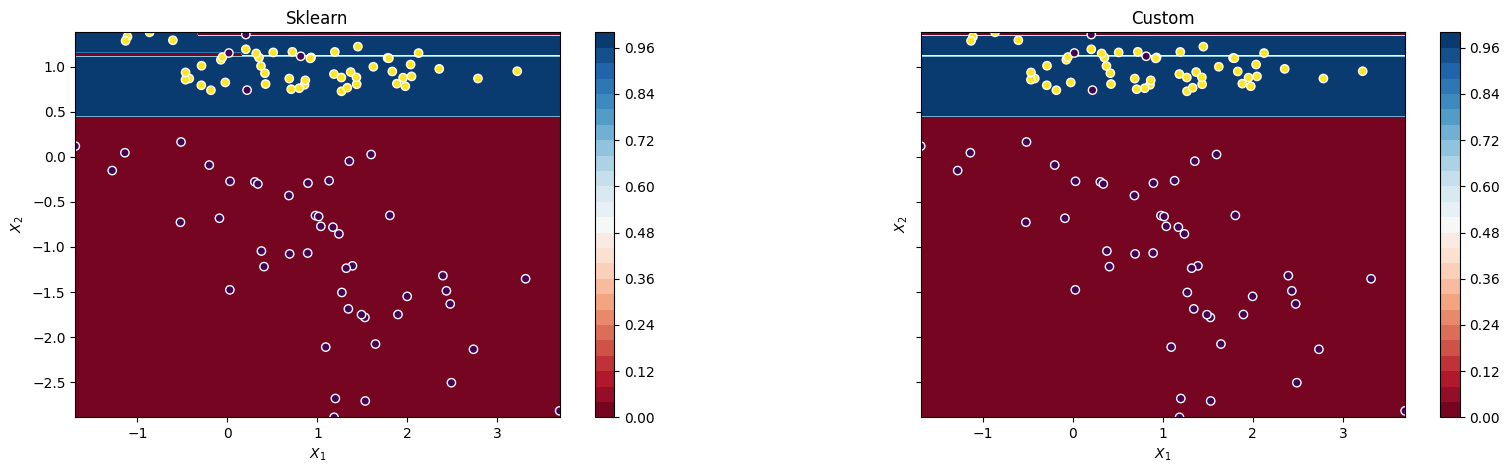

In [4]:
X, y = sklearn.datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0, n_classes=2, n_clusters_per_class=1)
y += 1
ylim = X[:, 1].min(), X[:, 1].max()
xlim = X[:, 0].min(), X[:, 0].max()
xx, yy = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]


def draw(probs, f, ax, title):
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="white")
    ax.set(aspect="equal", xlim=xlim, ylim=ylim,
           xlabel="$X_1$", ylabel="$X_2$")
    ax.set_title(title)


model = sklearn.tree.DecisionTreeClassifier(max_depth=10).fit(X, y)
custom = CustomDecisionTreeClassifier("gini", max_depth=10).fit(X, y)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
draw(model.predict_proba(grid)[:, 1].reshape(xx.shape), fig, ax1, "Sklearn")
draw(custom.predict_proba(grid)[:, 1].reshape(xx.shape), fig, ax2, "Custom")

In [5]:
X, y = sklearn.datasets.make_classification(
    n_samples=1000, n_features=4, n_informative=4, n_redundant=0, random_state=0, n_classes=6, n_clusters_per_class=1)
sklearn.model_selection.cross_val_score(model, X,y,cv=3),sklearn.model_selection.cross_val_score(custom, X,y,cv=3)

(array([0.70359281, 0.67867868, 0.66666667]),
 array([0.70958084, 0.70870871, 0.66666667]))

In [6]:
# custom.print()